<a href="https://colab.research.google.com/github/yonalex09/Analisis_de_datos/blob/main/Analisis%20No%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Precisión del modelo: 0.475 


Matriz de confusión:


[[ 4  1  5]
 [ 1  4  3]
 [ 5  6 11]]


 A continuacion, mostraremos el arbol de desiciones




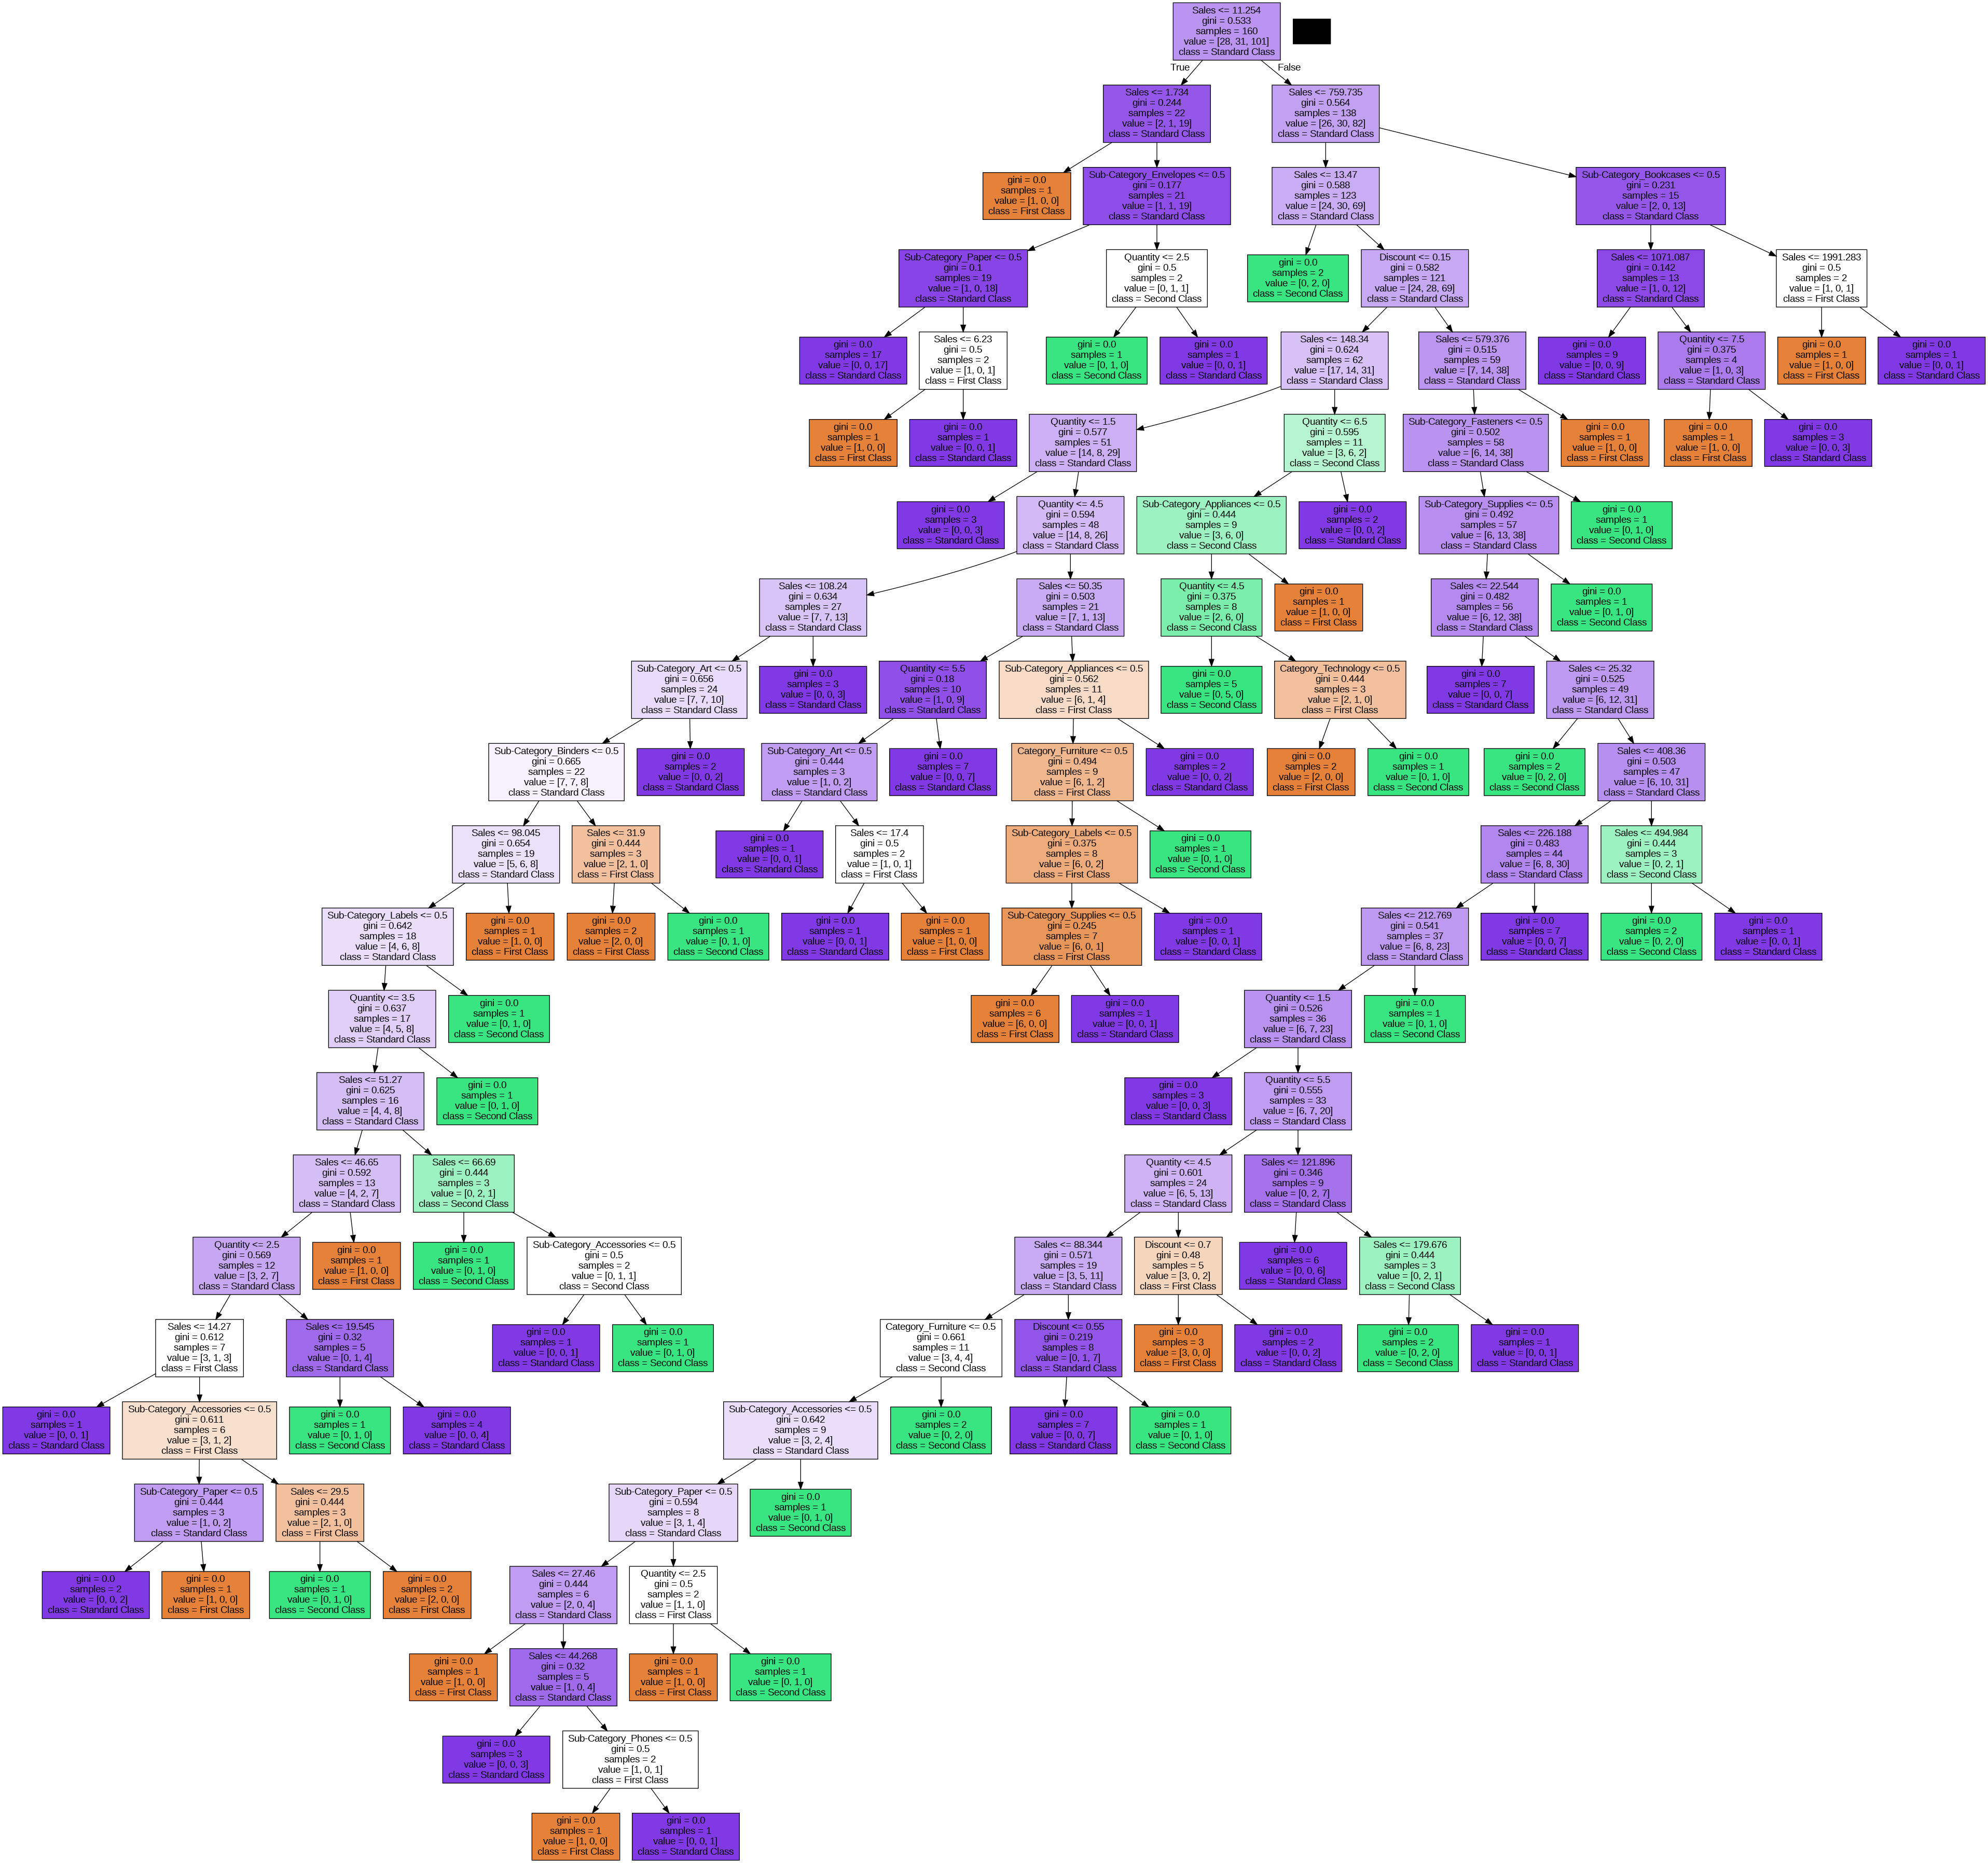

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Cargar los datos del archivo CSV
url = 'https://raw.githubusercontent.com/yonalex09/Analisis_de_datos/main/Sample%20-%20Superstore.csv'
data = pd.read_csv(url,nrows = 200, encoding='ISO-8859-1')

# Seleccionar las variables predictoras y la variable objetivo
X = data[['Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount']]
y = data['Ship Mode']

# Transformar las variables categóricas a numéricas
X = pd.get_dummies(X, columns=['Category', 'Sub-Category'])


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('\n\nPrecisión del modelo:', accuracy,'\n\n')

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n\n')
print(conf_matrix)

# Visualizar el árbol de decisión
print('\n\n A continuacion, mostraremos el arbol de desiciones\n\n')

dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=model.classes_, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


